# Calculate macroscopic current in response to a concentration jump or pulse using ``scalcs.cjumps`` library

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import sys
import time
import numpy as np
import scipy.integrate as scpi

from scalcs import mechanism
from scalcs import qmatlib as qml
from scalcs.samples import samples
from scalcs import cjumps

### The 5 state model used in CH82 as numerical example

In [3]:
mec = samples.CH82()
conc = 100e-9 # 100 nM
mec.set_eff('c', conc)
tstep = 5e-6
reclen = 50e-3

##### Instantaneous rise, exponential decay

In [4]:
cfunc = cjumps.pulse_instexp
cargs = (0.00001, 0.0, 0.005, 0.0025)

In [5]:
print ('ntesting inst_exp jump calculation speed...')

start = time.time()
t, c, P1i = cjumps.calculate_macro_response(mec, tstep, reclen, cfunc, cargs, method='integrate')
print ('integration took {0:.6f} s'.format(time.time() - start))
Popen1i = np.sum(P1i[: mec.kA], axis=0)

start = time.time()
t, c, P1d = cjumps.calculate_macro_response(mec, tstep, reclen, cfunc, cargs, method='direct')
print ('direct matrix calculation took {0:.6f} s'.format(time.time() - start))
Popen1d = np.sum(P1d[: mec.kA], axis=0)

np.testing.assert_almost_equal(max(Popen1i), max(Popen1d), 3)

ntesting inst_exp jump calculation speed...
integration took 0.038736 s
direct matrix calculation took 1.899367 s


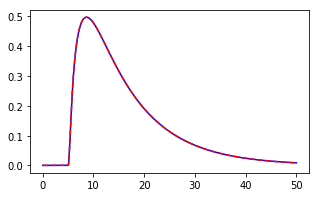

In [6]:
fig, ax  = plt.subplots(1,1, figsize=(5,3))
ax.plot(t* 1000, Popen1i,'b-' , t * 1000, Popen1d,'r--'); # , t * 1000, c01, 'g-')

##### Realistic concentration pulse

In [7]:
cfunc = cjumps.pulse_erf
cargs = (0.00001, 0.0, 0.01, 0.01, 0.0002, 0.0002)

In [8]:
print ('ntesting realistic jump calculation speed...')

start = time.time()
t, c, P1i = cjumps.calculate_macro_response(mec, tstep, reclen, cfunc, cargs, method='integrate')
print ('integration took {0:.6f} s'.format(time.time() - start))
Popen1i = np.sum(P1i[: mec.kA], axis=0)

start = time.time()
t, c, P1d = cjumps.calculate_macro_response(mec, tstep, reclen, cfunc, cargs, method='direct')
print ('direct matrix calculation took {0:.6f} s'.format(time.time() - start))
Popen1d = np.sum(P1d[: mec.kA], axis=0)

np.testing.assert_almost_equal(max(Popen1i), max(Popen1d), 3)

ntesting realistic jump calculation speed...
integration took 0.043493 s
direct matrix calculation took 2.261015 s


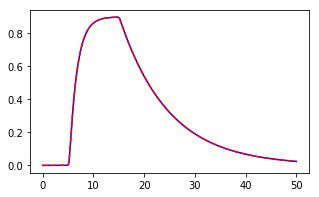

In [9]:
fig, ax  = plt.subplots(1,1, figsize=(5,3))
ax.plot(t* 1000, Popen1i,'b-' , t * 1000, Popen1d,'r--'); # , t * 1000, c01, 'g-')

### The 5 state model (2 binding steps, opening and desensitisation from propen state) used in CH95 as numerical example

In [10]:
# LOAD MECHANISM 
mec = samples.CCCDO()
mec.printout(sys.stdout)


class dcpyps.Mechanism
Values of unit rates [1/sec]:
0	From A2R  	to A2R*    	beta   	46.5
1	From A2R*  	to A2R    	alpha   	91.6
2	From A2D  	to A2R*    	doff   	1.8
3	From A2R*  	to A2D    	don   	8.4
4	From A2R  	to AR    	2koff   	9.4
5	From AR  	to A2R    	kon   	5000000.0
6	From AR  	to R    	koff   	4.7
7	From R  	to AR    	2kon   	10000000.0

Conductance of state A2R* (pS)  =      50

Number of open states = 1
Number of short-lived shut states (within burst) = 3
Number of long-lived shut states (between bursts) = 1
Number of desensitised states = 0

Number of cycles = 0

In [11]:
cmax = 0.001 # max concentrations
cb = 0.0 # basal concentrations
cpre1 = 0.25e-6
cpre0 = 0.0

base = 0.1 # time before pulse starts
prepulse = 0.6 # time before pulse starts
pulse = 0.05
cjargs1 = (cb, cpre1, cmax, base, prepulse, pulse)
cjargs0 = (cb, cpre0, cmax, base, prepulse, pulse)

cjlen = 2 # Record length
cjstep = 5e-4 # Sampling step
cjfunc = cjumps.pulse_square_with_prepulse

t0, c0, P0  = cjumps.calculate_macro_response(mec, cjstep, cjlen, cjfunc, cjargs0, method='direct')
Popen0 = np.sum(P0[: mec.kA], axis=0)
t1, c1, P1  = cjumps.calculate_macro_response(mec, cjstep, cjlen, cjfunc, cjargs1, method='direct')
Popen1 = np.sum(P1[: mec.kA], axis=0)

maxPopen no prepulse = -1.1997138509286043
maxPopen prepulse = -1.1650726790939123


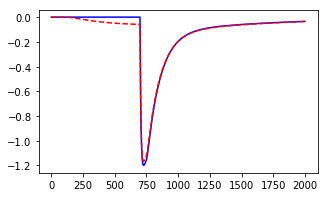

In [12]:
fig, ax  = plt.subplots(1,1, figsize=(5,3))
ax.plot(t0* 1000, -4*Popen0,'b-', t1 * 1000, -4*Popen1,'r--'); # , t * 1000, c01, 'g-')
print('maxPopen no prepulse =', min(-4*Popen0))
print('maxPopen prepulse =', min(-4*Popen1))

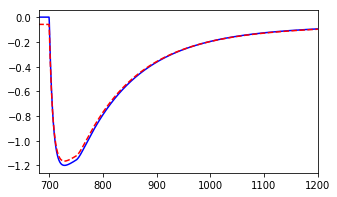

In [13]:
fig, ax  = plt.subplots(1,1, figsize=(5,3))
ax.plot(t0* 1000, -4*Popen0,'b-', t1 * 1000, -4*Popen1,'r--'); # , t * 1000, c01, 'g-')
ax.set_xlim(680, 1200);